In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
long_run_growth_list = [
    [-68000, 1, 1200, 0.1],
    [-8000, 5, 1200, 2.5],
    [-6000, 6.3, 900, 7],
    [-3000, 9.2, 900, 15],
    [-1000, 16.8, 900, 50],
    [1, 30.9, 900, 170],
    [800, 41.1, 900, 300],
    [1500, 53, 900, 500],
    [1770, 79.4, 1100, 750],
    [1870, 123.5, 1300, 1300],
    [2020, 2720.5, 11842, 7600]
    ]

long_run_growth_df = pd.DataFrame(
  data=np.array(long_run_growth_list), columns = ['year', 'human_ideas', 'income_level', 'population']                             
  )

long_run_growth_df['year'] = long_run_growth_df['year'].apply(np.int64)
initial_year = long_run_growth_df['year'][0:10]

span = []
g = []
h = []
n = []

for t in range(10):
    span = span +[long_run_growth_df['year'][t+1]-long_run_growth_df['year'][t]]
    h = h + [np.log(long_run_growth_df['human_ideas'][t+1]/long_run_growth_df['human_ideas'][t])/span[t]]
    g = g + [np.log(long_run_growth_df['income_level'][t+1]/long_run_growth_df['income_level'][t])/span[t]]
    n = n + [np.log(long_run_growth_df['population'][t+1]/long_run_growth_df['population'][t])/span[t]]

In [3]:
long_run_growth_df.set_index('year', inplace=True)

long_run_growth_df['income_level']

year
-68000     1200.0
-8000      1200.0
-6000       900.0
-3000       900.0
-1000       900.0
 1          900.0
 800        900.0
 1500       900.0
 1770      1100.0
 1870      1300.0
 2020     11842.0
Name: income_level, dtype: float64

Text(0, 0.5, 'Annual Income per Capita, 2020 Dollars')

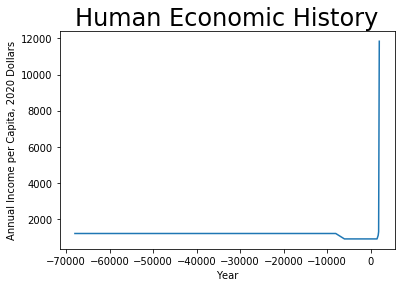

In [7]:
long_run_growth_df['income_level'].plot()
plt.title('Human Economic History', size=24)
plt.xlabel('Year')
plt.ylabel('Annual Income per Capita, 2020 Dollars')

Text(0, 0.5, 'Millions')

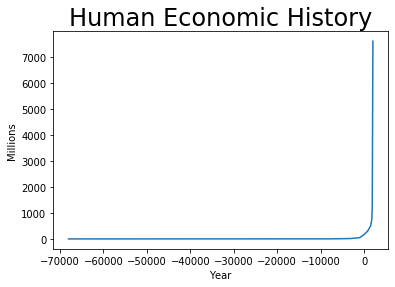

In [8]:
long_run_growth_df['population'].plot()
plt.title('Human Economic History', size=24)
plt.xlabel('Year')
plt.ylabel('Millions')
                   

Text(0, 0.5, 'Index of Useful Ideas Stock')

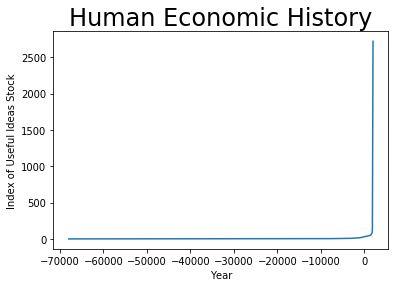

In [25]:
long_run_growth_df['human_ideas'].plot()
plt.title('Human Economic History', size=24)
plt.xlabel('Year')
plt.ylabel('Index of Useful Ideas Stock')

Text(0, 0.5, 'Log Annual Income per Capita, 2020 Dollars')

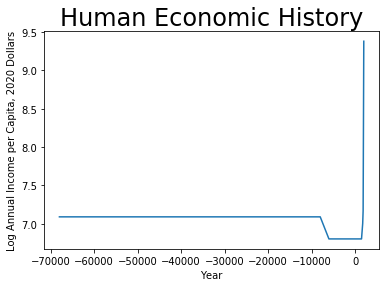

In [10]:
np.log(long_run_growth_df['income_level']).plot()
plt.title('Human Economic History', size=24)
plt.xlabel('Year')
plt.ylabel('Log Annual Income per Capita, 2020 Dollars')

Text(0, 0.5, 'Log Millions')

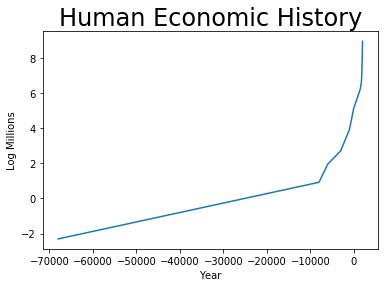

In [11]:
np.log(long_run_growth_df['population']).plot()
plt.title('Human Economic History', size=24)
plt.xlabel('Year')
plt.ylabel('Log Millions')          

Text(0, 0.5, 'Log Index of Useful Ideas Stock')

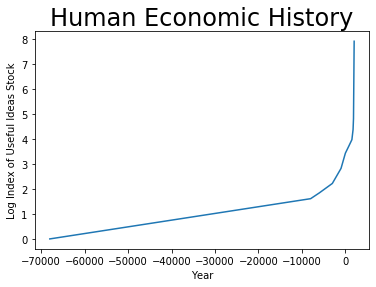

In [27]:
np.log(long_run_growth_df['human_ideas']).plot()
plt.title('Human Economic History', size=24)
plt.xlabel('Year')
plt.ylabel('Log Index of Useful Ideas Stock')

In [13]:
pd.options.display.float_format = '{:.0f}'.format

format_dict = {'year': '{d}', 'human_ideas': '{0:,.0f}', 
    'income_level': '${0:,.0f}', 'population': '{0:,.1f}'}

long_run_growth_df.style.format(format_dict)

In [14]:
long_run_growth_rates_df = pd.DataFrame(
    data=np.array([initial_year, span, h, g, n]).transpose(),
    columns = ['initial_year', 'span', 'h', 'g', 'n'])

long_run_growth_rates_df['initial_year'] = long_run_growth_rates_df['initial_year'].apply(np.int64)
long_run_growth_rates_df.set_index('initial_year', inplace=True)

format_dict = { 'span': '{0:.0f}', 'h': '{0:,.3%}', 
    'g': '{0:,.2%}', 'n': '{0:,.2%}'}

long_run_growth_rates_df.style.format(format_dict)

In [16]:
eras = eras[0:10]

long_run_growth_rates_df['eras'] = eras

long_run_growth_rates_df

span  h  g  n                    eras
initial_year                                       
-68000       60000  0  0  0   speciation? language?
-8000         2000  0 -0  0   agriculture & herding
-6000         3000  0  0  0      proto-agrarian age
-3000         2000  0  0  0                 writing
-1000         1001  0  0  0               axial age
 1             799  0  0  0    late-antiquity pause
 800           700  0  0  0              middle age
 1500          270  0  0  0   commercial revolution
 1770          100  0  0  0   industrial revolution
 1870          150  0  0  0  modern economic growth

In [15]:
eras = ['speciation? language?', 'agriculture & herding', 'proto-agrarian age',
        'writing', 'axial age', 'late-antiquity pause', 'middle age', 'commercial revolution',
        'industrial revolution', 'modern economic growth', 'whatever the 21st century brings']

long_run_growth_df['eras'] = eras

format_dict = {'year': '{d}', 'human_ideas': '{0:,.0f}', 
    'income_level': '${0:,.0f}', 'population': '{0:,.1f}'}

long_run_growth_df.style.format(format_dict)

# Employment-to-Population

In [17]:
# set up the environment for inline plotting, and download
# the libraries

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [18]:
# read the employment-population ratio data in from the internet
# into a dataframe:

employment_population_df = pd.read_csv(
    'https://delong.typepad.com/files/employment-to-population2.csv'
    )

# set the date column to be the index of the dataframe:

employment_population_df.set_index('Date', inplace=True)

In [19]:
# as downloaded, the employment_population_df dataframe includes
# source and other such information in the first seven lines of 
# the dataframe. we would like to move that information to a more
# convenient place so that it does not mess up presentation of 
# the data

# therefore we create a related "dict" object, which starts out 
# empty:

employment_population_dict = {}

# and we load the source and related information into the dict
# object:

for i in range(7):
    employment_population_dict[employment_population_df['Key'][i]] = employment_population_df['Value'][i]

# then we drop the source information from the dataframe:

employment_population_df.drop(['Key'], axis = 1, inplace=True)
employment_population_df.drop(['Value'], axis = 1, inplace=True)

# last, we add the dataframe as another element of the "dict"
# object so that it is kept close and related to its source
# information. If we ever want to see information about the
# source, simply replace the "df" at the end of the dataframe's
# name with a "dict", and then look in that object to see what
# is there:

employment_population_dict['Data'] = employment_population_df

# why have we jumped through all these hoops? so that somebody
# coming across this notebook file one or five or ten years from
# now will not be hopelessly lost in trying to figure out what
# is supposed to be going on here. if they want more information
# about just what the data in employment_population_df is, the
# fact that there is also an object called employment_population_dict
# will make it a very obvious place to look...

Text(0.5, 1.0, 'Employment to Population Ratio')

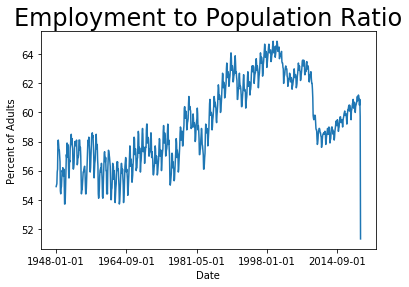

In [20]:
# having jumped through these hoops, we can now take a look at
# what the share of american adults who every month tell the 
# cps interviewers that they have jobs looks like:

employment_population_df.plot(legend=None)
plt.ylabel('Percent of Adults')
plt.title('Employment to Population Ratio', size=24)

Text(0.5, 1.0, 'Employment to Population Ratio')

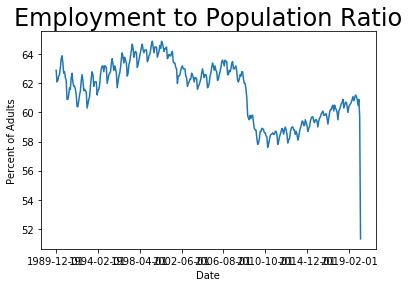

In [21]:
# if we just want to look at the data since 1990:

employment_population_df['1989-12-01':].plot(legend=None)
plt.ylabel('Percent of Adults')
plt.title('Employment to Population Ratio', size=24)

Text(0.5, 1.0, 'Employment to Population Ratio')

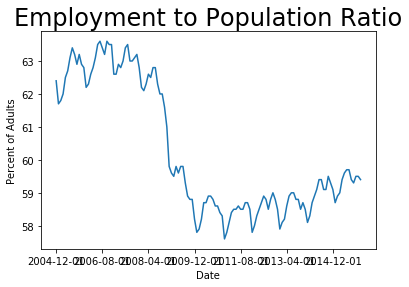

In [22]:
# and if we just want to look at the years 2005-2015—
# the years from the peak of the housing bubble until
# the federal reserve begins to try to "normalize" interest 
# rates because keeping interest rates as low as it 
# can in order to try to boost employment to offset 
# the damage done to the economy by the so-called "great 
# recession" is no longer its highest priority:

employment_population_df['2004-12-01':'2015-12-01'].plot(legend=None)

plt.ylabel('Percent of Adults')
plt.title('Employment to Population Ratio', size=24)

In [23]:
# remember that we stored information about the source
# of the data in a "dict" object? now let's look at that 
# "dict" object for information about the source of the 
# data series:

employment_population_dict

{'Data List': '20th Century Economic History',
 'Data Updated': '2020-05-08',
 'Link': 'https://research.stlouisfed.org/useraccount/datalists/244845',
 'Series ID': 'LNU02300000',
 'Title': 'Employment-Population Ratio, NSA',
 'Frequency': 'Monthly',
 'Source:': 'Current Population Survey',
 'Data':             Ratio
 Date             
 1948-01-01     55
 1948-02-01     55
 1948-03-01     55
 1948-04-01     56
 1948-05-01     56
 ...           ...
 2019-12-01     61
 2020-01-01     60
 2020-02-01     61
 2020-03-01     60
 2020-04-01     51
 
 [868 rows x 1 columns]}

The "dict" object says that the source of the data is the Current Population Survey, that the data was last updated on 2020-05-08, that the series is called "mployment-Population Ratio, NSA", that it is a monthly data series, that it is a ratio, that its series ID is LNU02300000, and that it can be found in the "20th Century Economic History" data list.

If we wanted to access any one of these, we could pull it out of the "dict" object directly:

In [24]:
employment_population_dict['Series ID']

'LNU02300000'

Spend some time playing with and analyzing this employment-population ratio series—this share of American adults who, each month, tell the CPS interviewers that they have jobs. See if you can identify all of these salient features of the series:

1. the seasonal cycle—the substantial fluctuations in the share of American adults at work that happen each and every year
    * the shrinking of the magnitude of the seasonal cycle: it is a much smaller deal now than it was in the first decade after World War II.
2. the business cycle—the large but definitely not regular fluctuations with a roughly seven-year period in the share of American adults with jobs
3. the large and rapid downward business-cycle fall in the employment share that is the "Great Recession" of 2008-2010
    * the remarkably slow bounce-back of the employment share from its Great Recession low
4. the thirty-year rise in the employment share with the coming of feminism: women were now not discouraged from taking jobs outside of housecleaners, waitresses, nurses, schoolteachers, and secretaries
5. the tendency of the employment share to fall as more people are retired as the population ages and people enter the labor force later as years spent in school increase
6. the collapse of the employment share in Coronavirus Spring